## Diwali Sales - Data Analysis

The analysis of Diwali sales data provides valuable insights into customer behavior, product preferences, and revenue trends during the festive season. Age-wise and income-group segmentation highlights the spending patterns, showcasing the contribution of different demographics to overall sales. Examining the top-performing product categories, such as electronics and home décor, reveals key consumer priorities and demand during Diwali. Discount-driven analysis underscores the impact of promotions on sales spikes, providing guidance for future pricing strategies. Regional sales data further uncovers purchasing trends across urban and rural areas, enabling businesses to tailor their marketing efforts. Lastly, time-based analysis of sales during the Diwali week identifies peak shopping days and hours, helping to optimize inventory and staffing. These findings form the basis for strategic decisions in marketing, inventory management, and enhancing customer engagement during future festive seasons.

**Importing necessary Libraries**

In [4]:
# Importing necessary libraries for data manipulation (NumPy, Pandas) and visualization (Matplotlib, Seaborn).
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape') # Loading the Diwali Sales dataset with proper encoding to handle special characters.

In [6]:
df.shape    # Checking the number of rows and columns in the Diwali Sales dataset.

(11251, 15)

In [7]:
df.head()   # Displaying the first five rows of the Diwali Sales dataset to understand its structure.

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)  # Dropping unnecessary columns ('Status' and 'unnamed1') from the dataset to clean the data.

In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [16]:
df.describe()   # Generating summary statistics for numerical columns in the dataset to understand data distribution.

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

## Gender

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6064\507141608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Gender',data = df, palette="pastel", edgecolor=(0, 0, 0), hue=None)


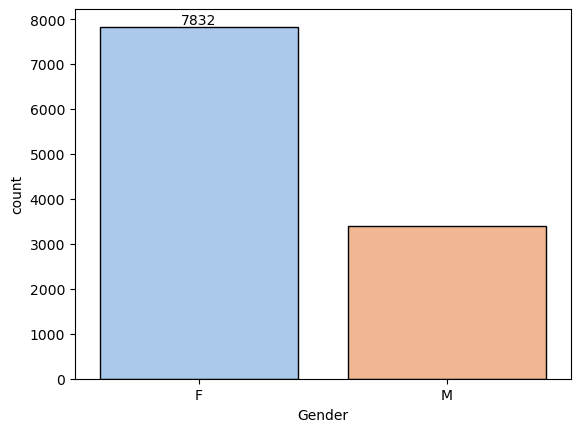

In [20]:
# Creating a count plot to visualize the distribution of purchases by gender, with labels on each bar for clarity.
ax = sns.countplot(x = 'Gender',data = df, palette="pastel", edgecolor=(0, 0, 0), hue=None)

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show() 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6064\3892428392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette="pastel", edgecolor=(0, 0, 0), hue=None)


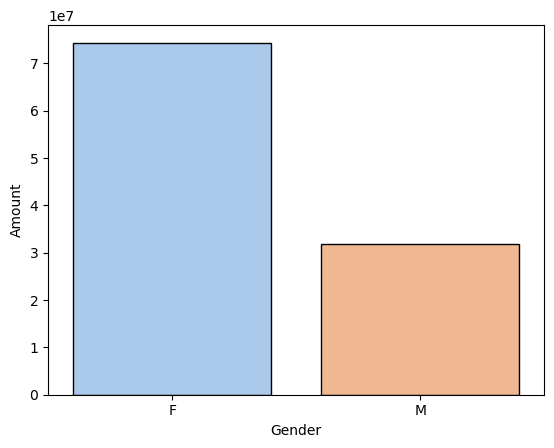

In [21]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette="pastel", edgecolor=(0, 0, 0), hue=None)
plt.show()

From the graphs above, it is evident that the majority of buyers are female, and their purchasing power surpasses that of males.

## Age

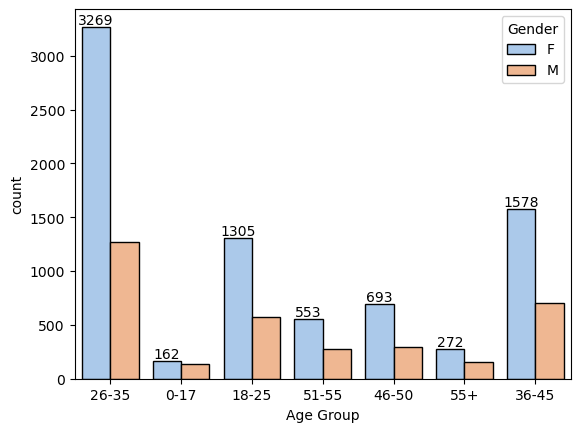

In [24]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette="pastel", edgecolor=(0, 0, 0))

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6064\3655275199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette="pastel", edgecolor=(0, 0, 0))


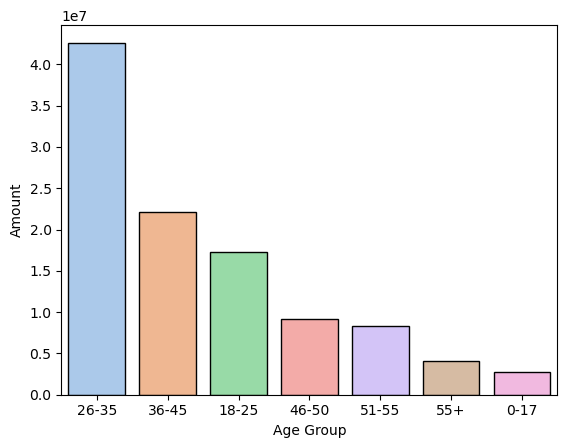

In [25]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette="pastel", edgecolor=(0, 0, 0))
plt.show()

The graphs above reveal that the majority of buyers are females aged between 26-35 years.

## State

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6064\1802277409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette="pastel", edgecolor=(0, 0, 0))


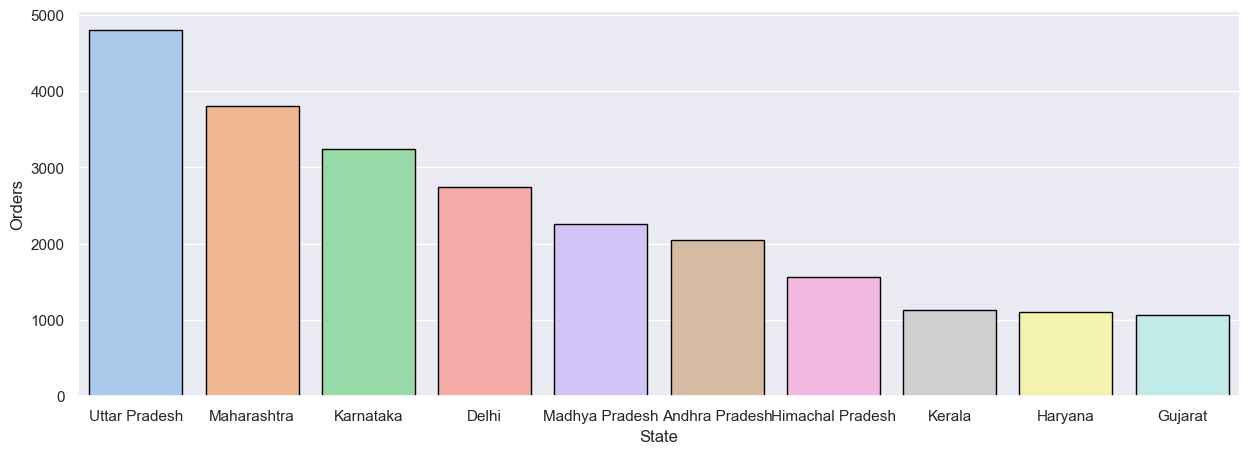

In [28]:
# Aggregating total orders by state and visualizing the top 10 states with the highest number of orders using a bar plot.
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette="pastel", edgecolor=(0, 0, 0))
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6064\888774998.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette="pastel", edgecolor=(0, 0, 0))


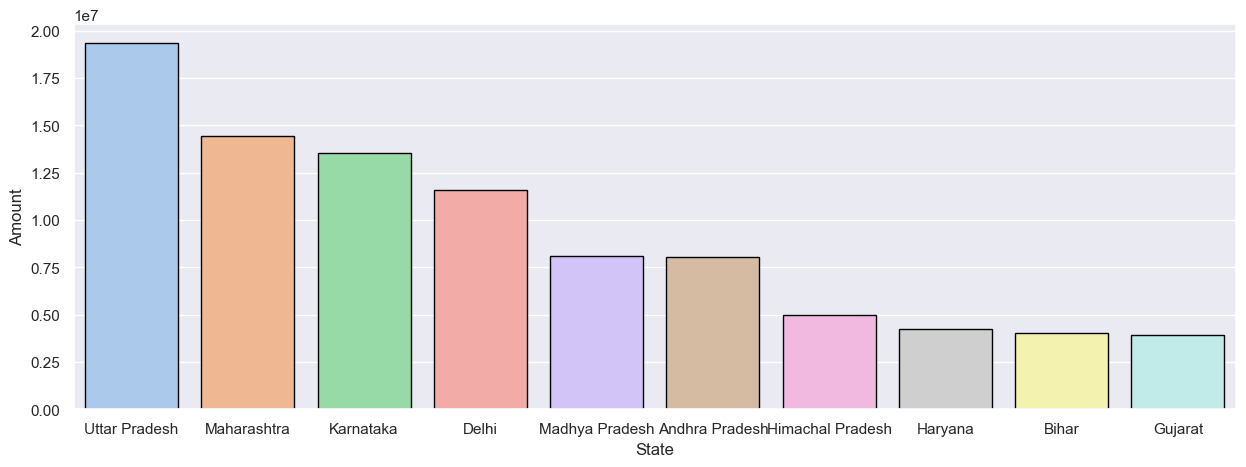

In [29]:
# Aggregating total sales amount by state and visualizing the top 10 states contributing the highest sales using a bar plot.
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette="pastel", edgecolor=(0, 0, 0))
plt.show()

## Marital Status

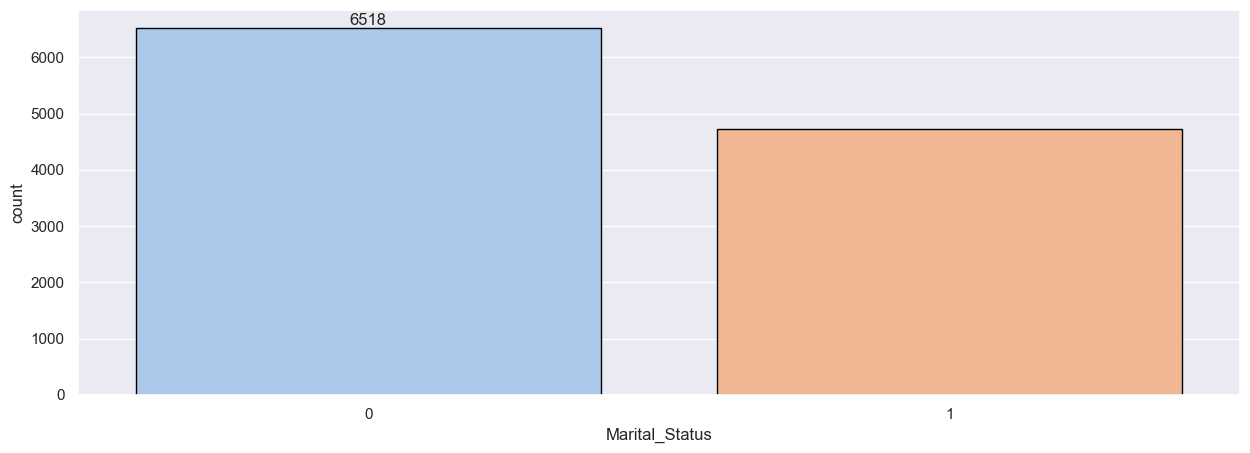

In [31]:
# Creating a count plot to visualize the distribution of marital status among buyers, with labels on bars for better clarity.
ax = sns.countplot(data = df, x = 'Marital_Status', palette="pastel", edgecolor=(0, 0, 0), hue="Marital_Status", legend=False)

sns.set(rc={'figure.figsize':(1,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

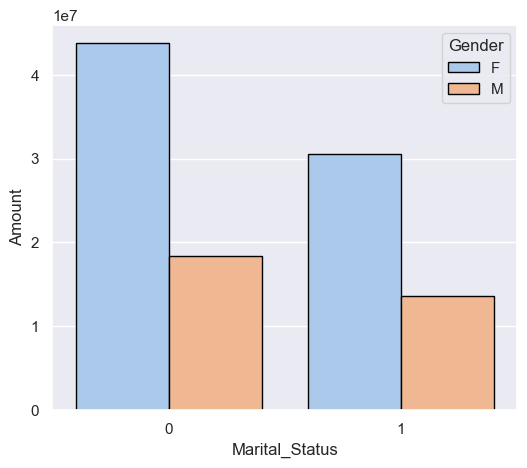

In [32]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette="pastel", edgecolor=(0, 0, 0))
plt.show()

The graphs above indicate that the majority of buyers are married women, and they exhibit a higher purchasing power compared to other groups.

## Occupation

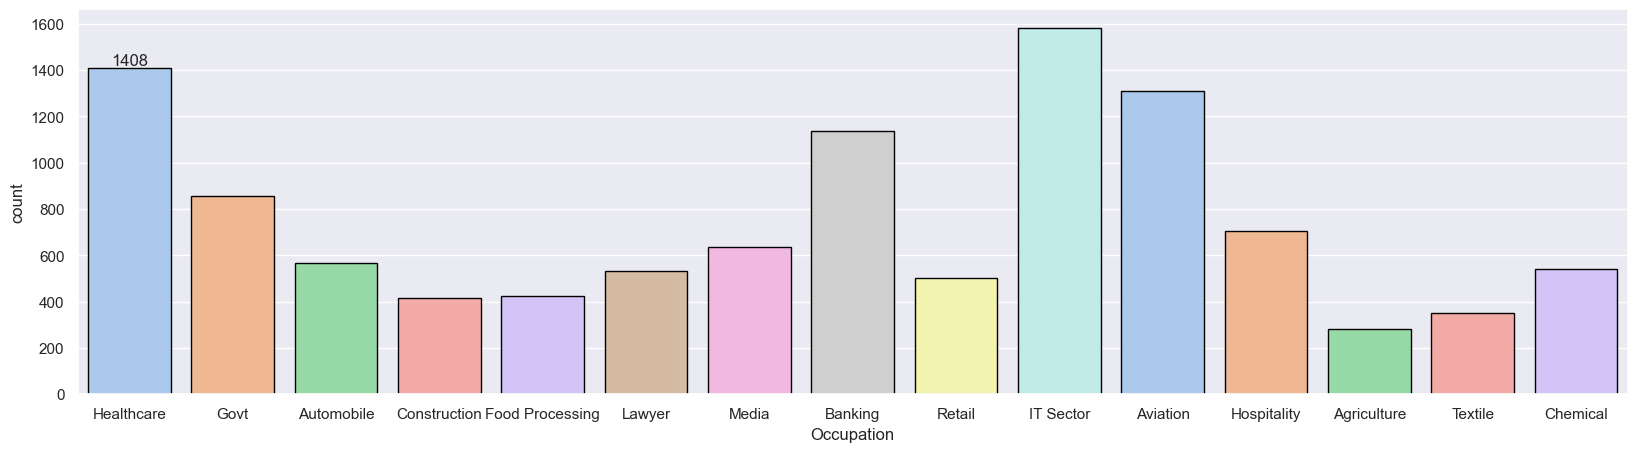

In [35]:
# Creating a count plot to display the distribution of buyers across various occupations, with labels on bars for clarity.
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',palette="pastel", edgecolor=(0, 0, 0), hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

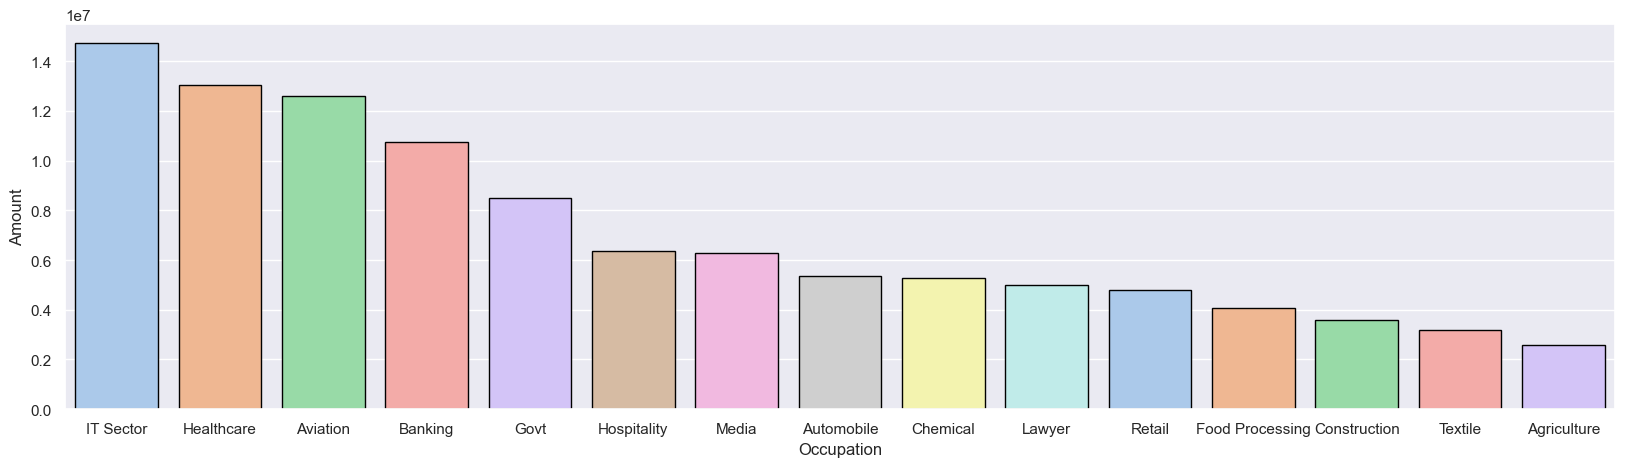

In [36]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette="pastel", edgecolor=(0, 0, 0), hue='Occupation')
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

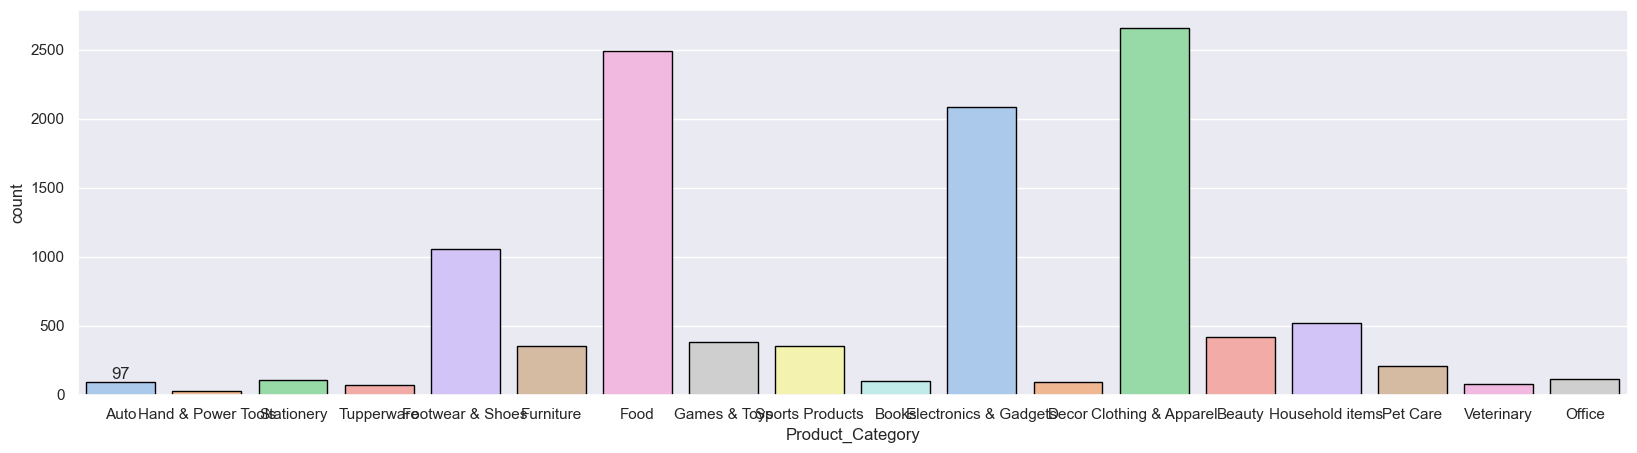

In [39]:
# Creating a count plot to display the distribution of purchases across various product categories, with labels on bars for clarity.
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category',palette="pastel", edgecolor=(0, 0, 0), hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

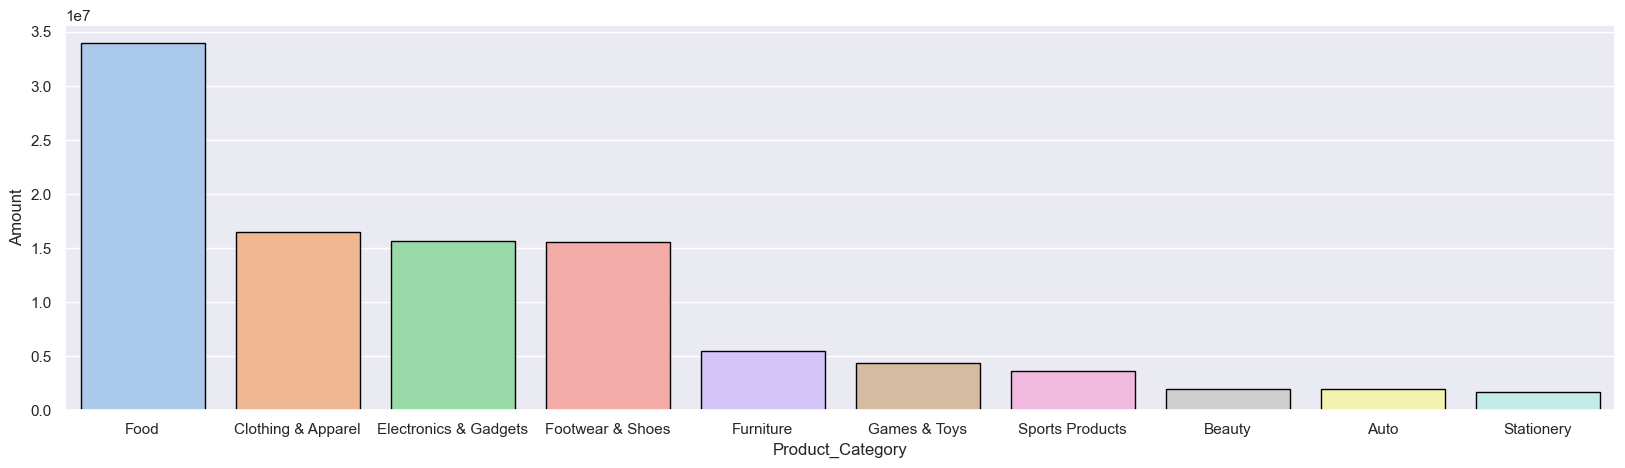

In [40]:
# Aggregating total sales amount by product category and visualizing the top 10 categories contributing the highest sales using a bar plot.
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette="pastel", edgecolor=(0, 0, 0), hue='Product_Category')
plt.show()

The graphs above show that the majority of sold products belong to the Food, Clothing, and Electronics categories.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6064\2776770837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette="pastel", edgecolor=(0, 0, 0))


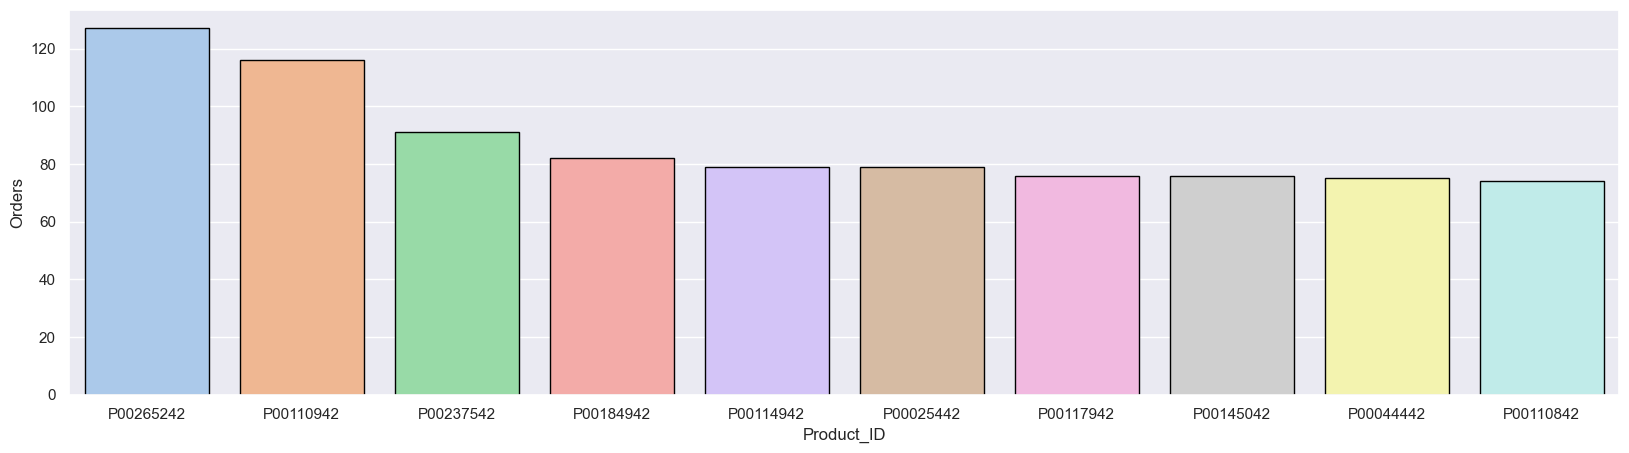

In [42]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette="pastel", edgecolor=(0, 0, 0))
plt.show()

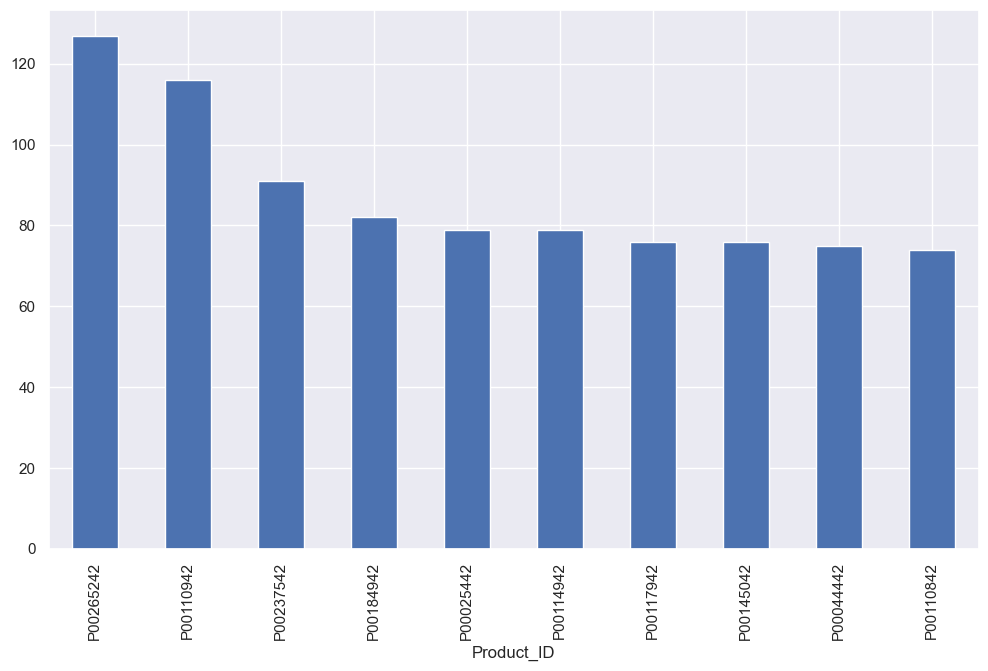

In [43]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

## Conclusion

Married women aged 26-35 years from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation, are more likely to purchase products in the Food, Clothing, and Electronics categories.